In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sms

#### Figure out the target group size

In [2]:
alpha=0.05
power=0.8
effect_sizes=[0.1,0.2,0.3,0.4,0.5,1]

for effect_size in effect_sizes:
    sample_size=int(sms.tt_ind_solve_power(effect_size=effect_size,alpha=alpha,power=power))
    print("Sample Size: ",sample_size,"Customers For Effect Size: ",effect_size)

Sample Size:  1570 Customers For Effect Size:  0.1
Sample Size:  393 Customers For Effect Size:  0.2
Sample Size:  175 Customers For Effect Size:  0.3
Sample Size:  99 Customers For Effect Size:  0.4
Sample Size:  63 Customers For Effect Size:  0.5
Sample Size:  16 Customers For Effect Size:  1


In [3]:
df = pd.read_csv('data/avg_transactions_after_campaign.csv')
print(df.shape)
df.sample(5)

(62, 3)


,campaign_date,control_group_avg_tran,test_group_avg_tran
31,2023-10-11,250.80,282.75
25,2023-10-05,239.47,216.37
38,2023-10-18,220.36,254.14
56,2023-11-05,213.86,256.03
14,2023-09-24,237.49,259.74


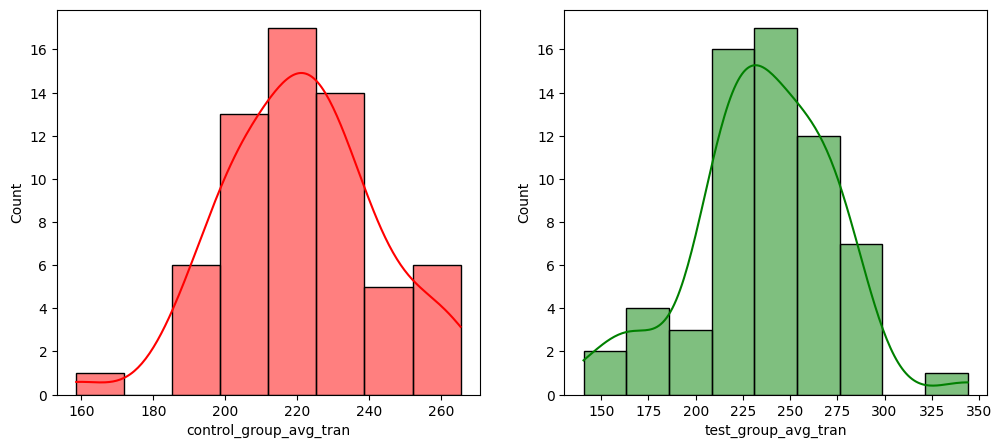

In [4]:

figure,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axes.flatten()
sns.histplot(x=df['control_group_avg_tran'],ax=axes[0],color="red",kde=True)
sns.histplot(x=df['test_group_avg_tran'],ax=axes[1],color="green",kde=True)
plt.show()

In [5]:
df[df['control_group_avg_tran']>df['test_group_avg_tran']]

,campaign_date,control_group_avg_tran,test_group_avg_tran
3,2023-09-13,214.92,214.85
8,2023-09-18,265.13,212.60
9,2023-09-19,232.88,207.63
16,2023-09-26,222.95,213.30
22,2023-10-02,238.39,203.10
23,2023-10-03,253.95,234.26
25,2023-10-05,239.47,216.37
26,2023-10-06,200.70,166.70
27,2023-10-07,200.91,170.01
28,2023-10-08,188.30,150.27


In [6]:
df[df['control_group_avg_tran']>df['test_group_avg_tran']].shape

(18, 3)

In [7]:
control_mean = df['control_group_avg_tran'].mean()
control_std = df['control_group_avg_tran'].std()
control_mean,control_std

(221.1751612903226, 21.35919211202701)

In [8]:
test_mean = df['test_group_avg_tran'].mean()
test_std = df['test_group_avg_tran'].std()
test_mean,test_std

(235.9835483870968, 36.658082109186374)

In [9]:
sample_size=df.shape[0]
sample_size

62

In [10]:
a=test_std**2/sample_size
b=control_std**2/sample_size
z_score=(test_mean-control_mean)/np.sqrt(a+b)
z_score

2.748297374569113

In [11]:
alpha=0.05
z_critical=stats.norm.ppf(1-alpha)
z_critical

1.644853626951472

In [12]:
z_score>z_critical

True

In [13]:
p_value=1-stats.norm.cdf(z_score)
p_value

0.0029952824622024865

In [19]:
p_value<alpha

True

In [20]:
1-0.025

0.975

In [21]:
z=stats.norm.ppf(1-0.025)
lower = test_mean-z*(test_std/np.sqrt(sample_size))
upper = test_mean+z*(test_std/np.sqrt(sample_size))
lower,upper

(226.85877713642867, 245.1083196377649)

Reject null hypothesis and conclude that new credit has more trans that old credit card in 18-25 age group customers